# NMF on Tara dataset

In [2]:
# imports
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time
import random 

import pandas

from oceancolor.tara import io as tara_io

from cnmf.oceanography import iops
from cnmf import zhu_nmf as nmf

In [3]:
%matplotlib ipympl

# Prep for NMF

In [4]:
wv_grid, final_tara, l23_a = iops.tara_matched_to_l23(low_cut=410.)

Loading Tara..


/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:265: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:266: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)


In [5]:
final_tara.shape

(229335, 58)

## Grab a random sub-sample to speed things up

In [10]:
# Set random seed
random.seed(101)

# Generate list of 10,000 objects
objects = list(range(final_tara.shape[0]))

random.shuffle(objects)

num_select = 30000
random_objects = objects[:num_select]
keep = np.array(random_objects)

In [13]:
rand_spec = final_tara[keep]
rand_spec.shape

(30000, 58)

## Inverse variance

In [14]:
sig = 0.0005
V = np.ones_like(rand_spec) / sig**2

# NMF

In [18]:
g = nmf.NMF(rand_spec.T, n_components=4, V=V.T)

In [19]:
chi2, time_used = g.SolveNMF(verbose=True) 

Current Chi2=964.2128, Previous Chi2=4983305.0857, Change=99.9807% @ niters=0
Current Chi2=252.5091, Previous Chi2=269.8541, Change=6.4275% @ niters=20
Current Chi2=91.0209, Previous Chi2=93.7981, Change=2.9608% @ niters=40
Current Chi2=62.0080, Previous Chi2=62.8379, Change=1.3207% @ niters=60
Current Chi2=50.6432, Previous Chi2=51.0374, Change=0.7723% @ niters=80
Current Chi2=45.0465, Previous Chi2=45.2471, Change=0.4435% @ niters=100
Current Chi2=41.9656, Previous Chi2=42.0916, Change=0.2992% @ niters=120
Current Chi2=39.5780, Previous Chi2=39.7004, Change=0.3082% @ niters=140
Current Chi2=36.7455, Previous Chi2=36.9100, Change=0.4457% @ niters=160
Current Chi2=32.8381, Previous Chi2=33.0601, Change=0.6717% @ niters=180
Current Chi2=28.0628, Previous Chi2=28.3072, Change=0.8636% @ niters=200
Current Chi2=23.4995, Previous Chi2=23.7043, Change=0.8639% @ niters=220
Current Chi2=20.1265, Previous Chi2=20.2617, Change=0.6674% @ niters=240
Current Chi2=18.0700, Previous Chi2=18.1470, Cha

# Check

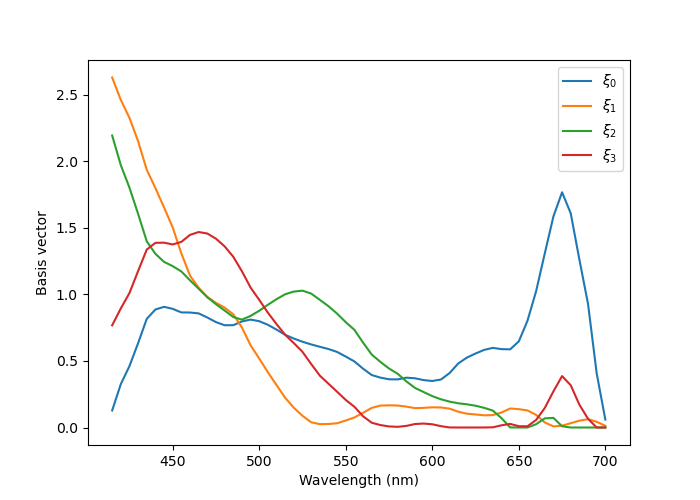

In [21]:
M = g.W.T
wave = wv_grid
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
for ss in range(M.shape[0]):
    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Basis vector')
ax.legend()
#
plt.show()